# Part1

## Dependencies

In [4]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = '#ffffff'

### Access CIFAR10 dataset

In [2]:
from torchvision.datasets.utils import download_and_extract_archive
url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
filename ='Imagenet.tgz'
root = 'D:/GISenseLab/DataSet/tmp/'
download_and_extract_archive(url, root, filename)

100%|██████████| 135107811/135107811 [07:35<00:00, 296889.53it/s]


Extracting D:/GISenseLab/DataSet/tmp/cifar10.tgz to Imagenet.tgz


In [5]:
data_dir = 'D:/GISenseLab/DataSet/Imagenet.tgz/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Visualize some images

Label: airplane


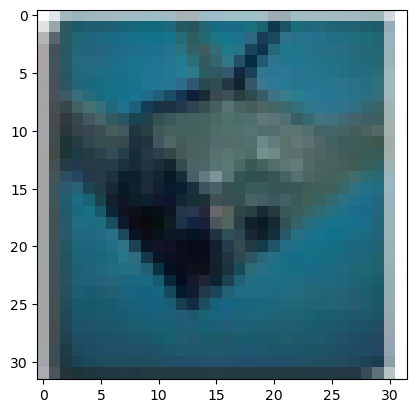

In [17]:
train_ds = ImageFolder(data_dir+'/train')
valid_ds = ImageFolder(data_dir+'/test')

image, label = train_ds[985] # select one image
plt.imshow(image)
print('Label:', train_ds.classes[label])

## Convert image into Tensors

In [18]:
# Use torchvision.transforms
train_tfms = tt.Compose([tt.ToTensor()])
valid_tfms = tt.Compose([tt.ToTensor()])

In [19]:
# again use the ImageLoader function to form training and testing sets of images.
# PyTorch datasets
train_ds = ImageFolder(data_dir + '/train',train_tfms)
valid_ds = ImageFolder(data_dir + '/test',valid_tfms)

# Gather  data in data loaders

In [21]:
"""
1. batch size as 104: optimize & experiment with different values.
2. shuffle set true: images can reshuffled at every epoch.
3. batch size: specifies the number os samples that are loaded per batch.
4. num_workers: the number of sub processors used while loading the data.
5. pin_memory set true: when you want you dataset to be pushed on GPU.
"""
batch_size = 104

train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)

val_loader = DataLoader(valid_ds, batch_size*2, num_workers=4, pin_memory=True)

# Using dataloader of training dataset to visualize a batch of images

images.shape: torch.Size([104, 3, 32, 32])


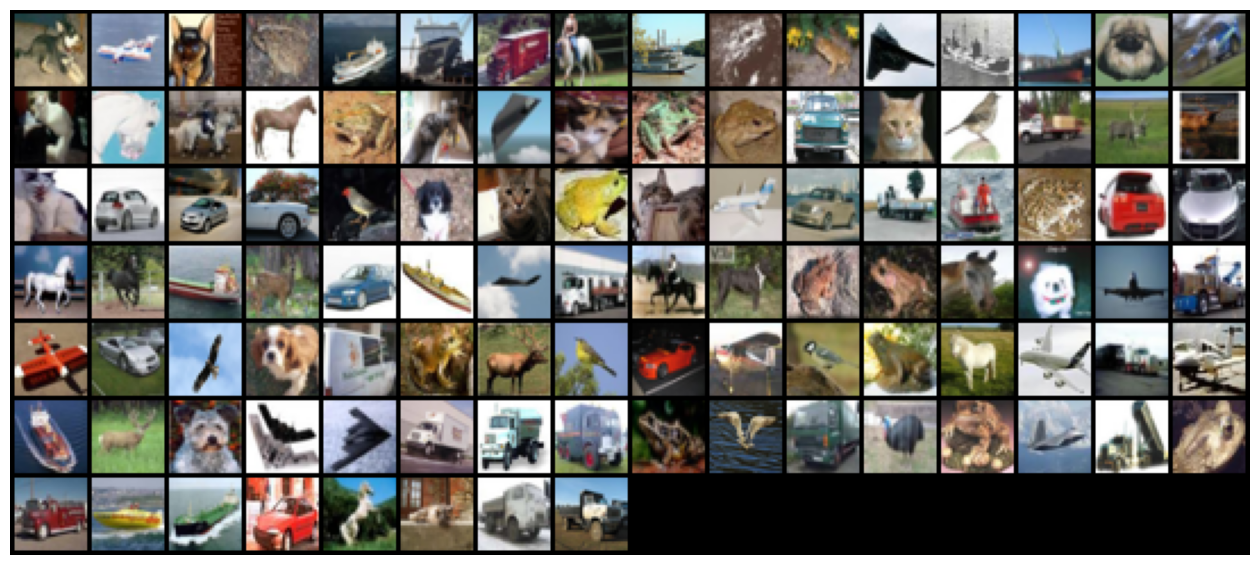

In [23]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16, 8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1,2,0)))
    break

All the images in the dataloader and the number of rows are given as the input to plot.
The pytorch image format has channel at its first place, so we need to permute function to place it at the last place as that is the matplotlib expects.